# Imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Loading and Understanding

## Data Loading

In [114]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## Data Understanding

    
| Attribute | Description |
| :----- | :----- |
| **id** | Unique ID for each home sold |
| **date** | Date of the home sale |
| **price** | Price of each home sold |
| **bedrooms** | Number of bedrooms |
| **bathrooms** | Number of bathrooms, where .5 accounts for a room with a toilet but no shower |
| **sqft_living** | Square footage of the home interior living space |
| **sqft_lot** | Square footage of the land space |
| **floors** | Number of floors |
| **waterfront** | A dummy variable for whether the home was overlooking the waterfront or not |
| **view** | An index from 0 to 4 of how good the view of the property was |
| **condition** | An index from 1 to 5 on the condition of the home |
| **grade** | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design |
| **sqft_above** | The square footage of the interior housing space that is above ground level |
| **sqft_basement** | The square footage of the interior housing space that is below ground level |
| **yr_built** | The year the home was initially built |
| **yr_renovated** | The year of the home’s last renovation |
| **zipcode** | What zip code area the home is in |
| **lat** | Latitude |
| **long** | Longitude |
| **sqft_living15** | The square footage of interior housing living space for the nearest 15 neighbors |
| **sqft_lot15** | The square footage of the land lots of the nearest 15 neighbors |



## Data overview

In [ ]:
data.shape

In [ ]:
data.info()

In [105]:
data.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
condition_type    0
dormitory_type    0
view_type         0
is_waterfront     0
house_age         0
basement          0
renovated         0
standard          0
day               0
month             0
year              0
seasons           0
median_price      0
buy               0
dtype: int64

In [106]:
data.duplicated().any()

False

# Data Cleaning

changing the column type ```date```  to ```datetime```

In [107]:
data['date'] = pd.to_datetime(data['date'])

Dropping registers with repeated "id"

In [108]:
data = data.drop_duplicates(subset='id', keep='last')

Replacing the bedrooms outliers by it's median

In [109]:
data.loc[data['bedrooms'] > 10, 'bedrooms'] = data['bedrooms'].median()

# Exploratory Data Analysis (EDA)

## Creating new features to better understand the data

In [110]:
# column "condition type"
data['condition_type'] = data['condition'].apply(lambda x: 'terrible' if x == 1 else
                                                            'bad' if x == 2 else
                                                            'regular' if x == 3 else
                                                            'good' if x == 4 else
                                                            'excellent')

# column dormitory_type"
data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x <= 1 else
                                                       'apartment' if (x > 1) & (x <= 4) else
                                                       'house')

# column view_type"
data['view_type'] = data['view'].apply(lambda x: 'terrible' if x == 0 else
                                                            'bad' if x == 1 else
                                                            'regular' if x == 2 else
                                                            'good' if x == 3 else
                                                            'excellent')

# column "is_waterfront"
data['is_waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

# column "house_age"
data['house_age'] = data['yr_built'].apply(lambda x: 'old_property' if x < 1955 else 'new_property')

# column "basement"
data['basement'] = data['sqft_basement'].apply(lambda x: 'no' if x == 0 else 'yes')

# column "renovated"
data['renovated'] = data['yr_renovated'].apply(lambda x: 'yes' if x != 0 else 'no')

# column "standard"
data['standard'] = np.where(data['price'] > 540000, 'high_standard', 'low_standard')


# columns "day", "month", "year" and "seasons"
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['seasons'] = data['month'].apply(lambda x: 'summer' if x in([6, 7, 8]) else
                                                 'autumn' if x in([9, 10, 11]) else
                                                 'winter' if x in([12, 1, 2]) else
                                                 'spring')

In [111]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,house_age,basement,renovated,standard,day,month,year,seasons,median_price,buy
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,new_property,no,no,low_standard,13,10,2014,autumn,279500.00,yes
1,4060000240,2014-06-23,205425.00,2,1.00,880,6780,1.00,0,0,...,old_property,no,no,low_standard,23,6,2014,summer,279500.00,yes
2,4058801670,2014-07-17,445000.00,3,2.25,2100,8201,1.00,0,2,...,new_property,yes,no,low_standard,17,7,2014,summer,279500.00,no
3,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1.00,0,0,...,new_property,no,no,low_standard,25,9,2014,autumn,279500.00,yes
4,6874200960,2015-02-27,170000.00,2,1.00,860,5265,1.00,0,0,...,old_property,no,no,low_standard,27,2,2015,winter,279500.00,yes


In [113]:
data.to_csv("data/kc_cleaned.csv", index=False)

creating a data frame with the descriptive statistics

In [12]:
descriptive_statistics = pd.DataFrame(data.describe().T)
descriptive_statistics.drop(index=['id', 'zipcode', 'lat','long'], inplace=True)
descriptive_statistics

,count,mean,std,min,25%,50%,75%,max
price,21436.00,541649.96,367314.93,75000.00,324866.00,450000.00,645000.00,7700000.00
bedrooms,21436.00,3.37,0.91,0.00,3.00,3.00,4.00,10.00
bathrooms,21436.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21436.00,2082.70,919.15,290.00,1430.00,1920.00,2550.00,13540.00
sqft_lot,21436.00,15135.64,41538.62,520.00,5040.00,7614.00,10696.25,1651359.00
floors,21436.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21436.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21436.00,0.24,0.77,0.00,0.00,0.00,0.00,4.00
condition,21436.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21436.00,7.66,1.17,1.00,7.00,7.00,8.00,13.00


## Business Hypothesis

### H1. Waterfront properties are 30% more expensive, on average.

In [13]:
avg_waterfront_price = data[['price', 'is_waterfront']].groupby('is_waterfront').mean().sort_values(by='price', ascending=False).reset_index()
avg_waterfront_price

,is_waterfront,price
0,yes,1661876.02
1,no,533066.46


In [14]:
perc_waterfront_price = (avg_waterfront_price.loc[0, 'price'] - avg_waterfront_price.loc[1, 'price']) / avg_waterfront_price.loc[1, 'price'] * 100
perc_waterfront_price

print(f"Waterfront properties are on average {perc_waterfront_price:.2f}% more expensive than properties with no water view")

Waterfront properties are on average 211.76% more expensive than properties with no water view


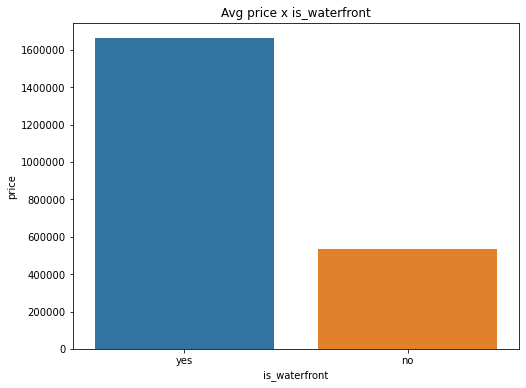

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='is_waterfront', y='price', data=avg_waterfront_price)
ax.set_title('Avg price x is_waterfront')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

**True: Waterfront properties are 211.76% more expensive than properties with no waterfront**

### H2: Properties built before 1955 are 50% cheaper in average

In [16]:
avg_house_age_price = data[['price', 'house_age']].groupby('house_age').mean().reset_index()
avg_house_age_price

,house_age,price
0,new_property,542265.19
1,old_property,540100.38


In [17]:
perc_house_age_price = (avg_house_age_price.loc[0, 'price'] - avg_house_age_price.loc[1, 'price']) / avg_house_age_price.loc[1, 'price'] * 100
perc_house_age_price

print(f"Properties built before 1955 are {perc_house_age_price:.2f}% cheaper than those built after 1955")

Properties built before 1955 are 0.40% cheaper than those built after 1955


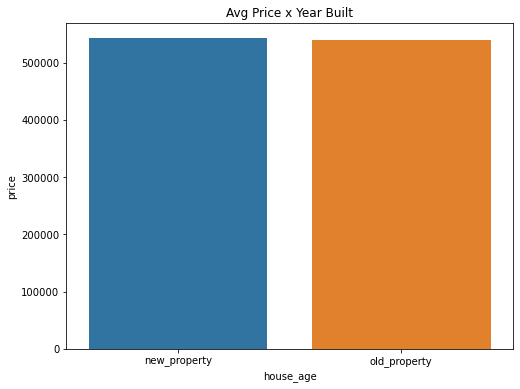

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='house_age', y='price', data=avg_house_age_price)
ax.set_title('Avg Price x Year Built')
plt.show()

**False: Properties built before 1955 are only 0.40% cheaper than those built after 1955**

### H3: Properties without basement have, in average,```sqft_lot``` 50% bigger than properties with basement

In [19]:
avg_sqftlot_basement = data[['sqft_lot', 'basement']].groupby('basement').mean().reset_index()
avg_sqftlot_basement

,basement,sqft_lot
0,no,16325.93
1,yes,13295.99


In [20]:
perc_sqftlot_basement = (avg_sqftlot_basement.loc[0, 'sqft_lot'] - avg_sqftlot_basement.loc[1, 'sqft_lot'])  / avg_sqftlot_basement.loc[0, 'sqft_lot'] * 100
perc_sqftlot_basement

print(f"Properties without basement have sqft_lot {perc_sqftlot_basement:.2f}% bigger than properties with basement")

Properties without basement have sqft_lot 18.56% bigger than properties with basement


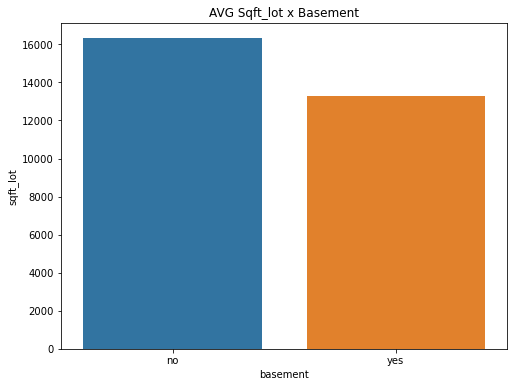

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='basement', y='sqft_lot', data=avg_sqftlot_basement)
ax.set_title("AVG Sqft_lot x Basement")
plt.show()

**False: Properties without basement have lot area 18,56% bigger than properties with basement**

### H4: The average growth in property prices YoY (year over year) is 10%

In [22]:
avg_price_year = data[['price', 'year']].groupby('year').mean().reset_index()
avg_price_year

,year,price
0,2014,541334.57
1,2015,542304.27


In [23]:
perc_avg_price_year = (avg_price_year.loc[1, 'price'] - avg_price_year.loc[0, 'price']) / avg_price_year.loc[1, 'price'] * 100
perc_avg_price_year

print(f"The average price growth year over year is {perc_avg_price_year:.2f}%")

The average price growth year over year is 0.18%


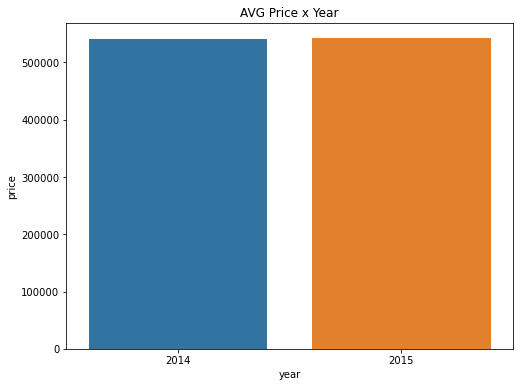

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='year', y='price', data=avg_price_year)
ax.set_title("AVG Price x Year")
plt.show()

**False: The average price growth year over year was only 0.18%**

### H5: Properties with 3 bathrooms have an average price growth month over month (MoM) about 15%

In [25]:
avg_price_bathroom = data.loc[data['bathrooms'] == 3, ['price', 'month']].groupby('month').mean().reset_index()
avg_price_bathroom

,month,price
0,1,672923.17
1,2,696714.42
2,3,768495.10
3,4,709751.99
4,5,691097.63
5,6,764084.29
6,7,741405.04
7,8,743506.45
8,9,650464.70
9,10,646302.35


In [26]:
variation = [0]
for i in range(0, 12):
    if i == 0:
        pass
    else:
        variation.append((avg_price_bathroom.loc[i, 'price'] - avg_price_bathroom.loc[i-1, 'price']) / avg_price_bathroom.loc[i-1, 'price'] * 100)


avg_price_bathroom['% variation'] = variation

In [27]:
avg_price_bathroom

,month,price,% variation
0,1,672923.17,0.00
1,2,696714.42,3.54
2,3,768495.10,10.30
3,4,709751.99,-7.64
4,5,691097.63,-2.63
5,6,764084.29,10.56
6,7,741405.04,-2.97
7,8,743506.45,0.28
8,9,650464.70,-12.51
9,10,646302.35,-0.64


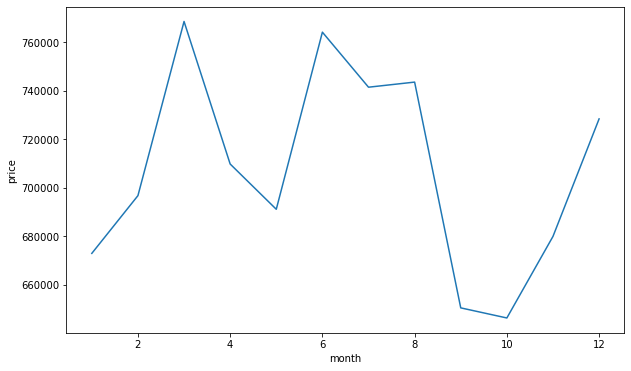

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.lineplot(x='month', y='price', data=avg_price_bathroom)
plt.show()

**False: There is no constant average growth in the price of 3-bathroom properties**


### H6: Properties in excellent condition are in average, 25% more expensive than properties in terrible condition

In [29]:
avg_price_condition = data.loc[data['condition_type'].isin(['terrible', 'excellent']), ['price', 'condition_type']].groupby('condition_type').mean().reset_index()
avg_price_condition

,condition_type,price
0,excellent,613127.48
1,terrible,342325.86


In [30]:
perc_avg_price_condition = (avg_price_condition.loc[0, 'price'] - avg_price_condition.loc[1, 'price']) / avg_price_condition.loc[0, 'price'] * 100
perc_avg_price_condition

print(f"Properties in excellent condition are, in average {perc_avg_price_condition:.2f}% more expensive than properties in terrible condition")

Properties in excellent condition are, in average 44.17% more expensive than properties in terrible condition


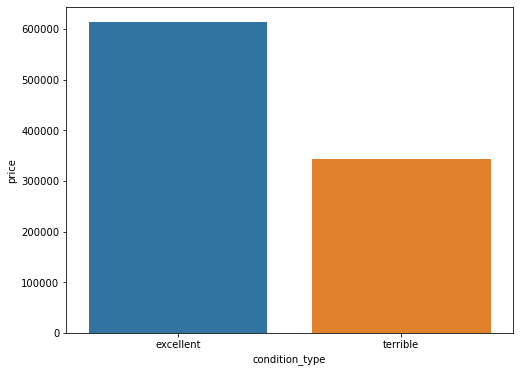

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='condition_type', y='price', data=avg_price_condition)

**True: Properties in excellent condition are, in average 44,17% more expensive than properties in terrible condition**

### H7: The price of properties with more than 50 years of construction and which have undergone renovation is in average, 20% higher than those that have not been renovated

In [32]:
avg_price_renovated = data.loc[data['yr_built'] < 1965, ['price', 'renovated']].groupby('renovated').mean().reset_index()
avg_price_renovated

,renovated,price
0,no,496127.58
1,yes,747174.34


In [51]:
perc_avg_price_renovated = (avg_price_renovated.loc[1, 'price'] - avg_price_renovated.loc[0, 'price']) / avg_price_renovated.loc[1, 'price'] * 100
perc_avg_price_renovated

print(f"The price of properties with more than 50 years of construction and undergone renovation are in average {perc_avg_price_renovated:.2f}% higher than those that haven't been renovated ")

The price of properties with more than 50 years of construction and undergone renovation are in average 33.60% higher than those that haven't been renovated 


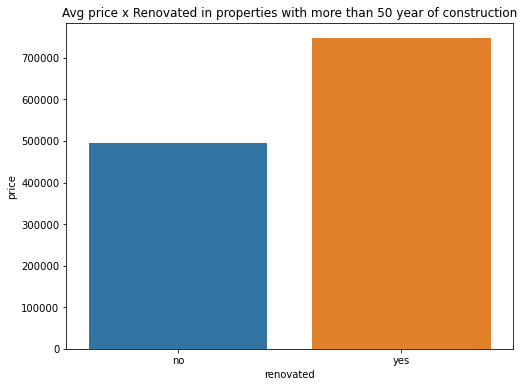

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='renovated', y='price', data=avg_price_renovated)
ax.set_title("Avg price x Renovated in properties with more than 50 year of construction")
plt.show()

**True: The price of properties with more than 50 years of construction and undergone renovation are in average 33.60% higher than those that haven't been renovated**

### H8: In properties with water view, the price is on average 20% higher for those with an excellent view, compared to those with a regular view

In [35]:
avg_waterfront_view = data.loc[(data['is_waterfront'] == 'yes') & (data['view_type'].isin(['regular', 'excellent'])), ['price', 'view_type']].groupby('view_type').mean().reset_index()
avg_waterfront_view

,view_type,price
0,excellent,1727691.05
1,regular,1841875.00


In [36]:
perc_waterfront_view = (avg_waterfront_view.loc[1, 'price'] - avg_waterfront_view.loc[0, 'price']) / avg_waterfront_view.loc[0, 'price'] * 100
perc_waterfront_view

print(f"The average price of properties with water view is {perc_waterfront_view:.2f}% higher for those with regular view, compared to those with excellent view")

The average price of properties with water view is 6.61% higher for those with regular view, compared to those with excellent view


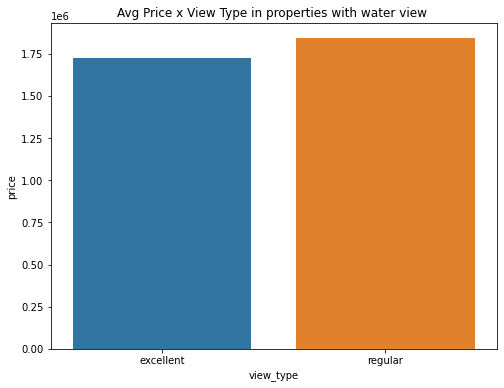

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='view_type', y='price', data=avg_waterfront_view)
ax.set_title('Avg Price x View Type in properties with water view ')
plt.show()

**False: The average price of properties with water view is 6.61% higher for those with regular view, compared to those with excellent view**

### H9: The average living room size in high-standard properties is 35% larger than in low-standard properties

In [38]:
avg_sqft_living_standard = data[['sqft_living', 'standard']].groupby('standard').mean().reset_index()
avg_sqft_living_standard

,standard,sqft_living
0,high_standard,2741.78
1,low_standard,1698.43


In [39]:
perc_avg_sqft_living_standard = (avg_sqft_living_standard.loc[0, 'sqft_living'] - avg_sqft_living_standard.loc[1, 'sqft_living']) / avg_sqft_living_standard.loc[0, 'sqft_living'] * 100
perc_avg_sqft_living_standard

print(f"The average living room size in high-standard properties is {perc_avg_sqft_living_standard:.2f}% larger than in low-standard properties")

The average living room size in high-standard properties is 38.05% larger than in low-standard properties


Text(0.5, 1.0, 'Avg size of sqft_living vs Standard')

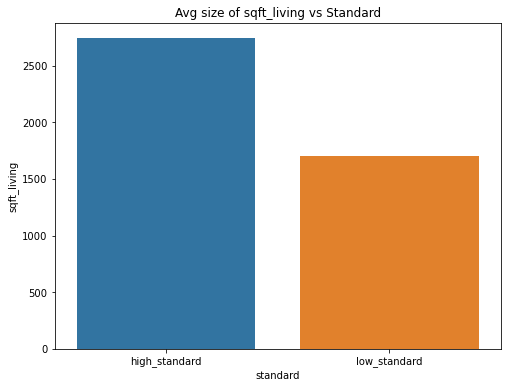

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='standard', y='sqft_living', data=avg_sqft_living_standard)
ax.set_title("Avg size of sqft_living vs Standard")

**True: The average living room size in high-standard properties is 38.05% larger than in low-standard properties**

### H10: The price of the properties are on average 10% higher in summer than in winter


In [45]:
avg_price_season = data.loc[data['seasons'].isin(['summer', 'winter']), ['seasons', 'price']].groupby('seasons').mean().reset_index()
avg_price_season

,seasons,price
0,summer,548939.99
1,winter,520295.47


In [48]:
perc_avg_price_season = (avg_price_season.loc[0, 'price'] - avg_price_season.loc[1, 'price']) / avg_price_season.loc[0, 'price'] * 100
perc_avg_price_season

print(f"The price of the properties are {perc_avg_price_season:.2f}% higher in summer compared to winter")

The price of the properties are 5.22% higher in summer compared to winter


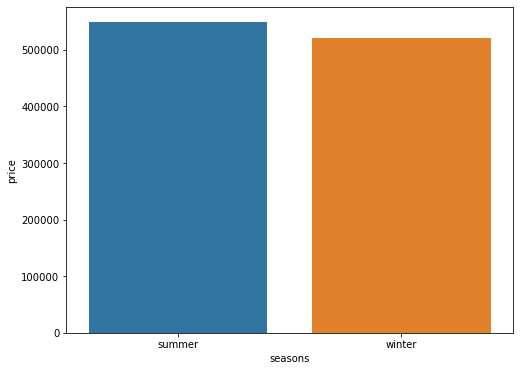

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='seasons', y='price', data=avg_price_season)
plt.show()

**False: The price of the properties are only 5.22% higher in summer compared to winter**

# Answering the business questions

## What properties should House Rocket buy and for which price?

In [52]:
df = data[['price', 'zipcode']].groupby('zipcode').median().sort_values(by='price').reset_index()
df.rename(columns={'price': 'median_price'}, inplace=True)
df

,zipcode,median_price
0,98002,235000.00
1,98168,237000.00
2,98032,250000.00
3,98001,260000.00
4,98188,265000.00
...,...,...
65,98005,765475.00
66,98112,917500.00
67,98040,993750.00
68,98004,1150000.00


In [53]:
data = pd.merge(data, df, how='inner')

In [54]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,is_waterfront,house_age,basement,renovated,standard,day,month,year,seasons,median_price
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,no,new_property,no,no,low_standard,13,10,2014,autumn,279500.00
1,4060000240,2014-06-23,205425.00,2,1.00,880,6780,1.00,0,0,...,no,old_property,no,no,low_standard,23,6,2014,summer,279500.00
2,4058801670,2014-07-17,445000.00,3,2.25,2100,8201,1.00,0,2,...,no,new_property,yes,no,low_standard,17,7,2014,summer,279500.00
3,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1.00,0,0,...,no,new_property,no,no,low_standard,25,9,2014,autumn,279500.00
4,6874200960,2015-02-27,170000.00,2,1.00,860,5265,1.00,0,0,...,no,old_property,no,no,low_standard,27,2,2015,winter,279500.00


In [55]:
data['buy'] = data[['price', 'median_price', 'condition']].apply(lambda x: 'yes' if (x['price'] < x['median_price']) & (x['condition'] >= 3) else 'no', axis=1)

In [56]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_type',
       'dormitory_type', 'view_type', 'is_waterfront', 'house_age', 'basement',
       'renovated', 'standard', 'day', 'month', 'year', 'seasons',
       'median_price', 'buy'],
      dtype='object')

In [72]:
df_buy_opportunities = data.loc[data['buy'] == 'yes', ['id', 'zipcode', 'lat', 'long', 'yr_built', 'yr_renovated',
                                                      'condition', 'condition_type', 'view_type',
                                                      'dormitory_type', 'bedrooms', 'bathrooms','sqft_living',
                                                      'sqft_lot', 'floors', 'standard', 'seasons', 'price', 'median_price', 'buy']].sort_values(by=['price', 'condition'], ascending=[True, False]).reset_index(drop=True)
df_buy_opportunities

,id,zipcode,lat,long,yr_built,yr_renovated,condition,condition_type,view_type,dormitory_type,bedrooms,bathrooms,sqft_living,sqft_lot,floors,standard,seasons,price,median_price,buy
0,3421079032,98022,47.26,-121.91,1966,0,3,regular,terrible,studio,1,0.00,670,43377,1.00,low_standard,winter,75000.00,279500.00,yes
1,7999600180,98168,47.47,-122.27,1918,0,3,regular,terrible,apartment,2,1.00,900,8580,1.00,low_standard,spring,83000.00,237000.00,yes
2,1523049188,98168,47.48,-122.27,1949,0,3,regular,terrible,apartment,2,1.00,700,20130,1.00,low_standard,spring,84000.00,237000.00,yes
3,1322049150,98032,47.39,-122.24,1947,0,3,regular,terrible,apartment,2,1.00,910,9753,1.00,low_standard,spring,85000.00,250000.00,yes
4,9320900420,98023,47.30,-122.36,1969,0,4,good,terrible,apartment,3,1.00,900,4750,1.00,low_standard,autumn,89000.00,269000.00,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,2525049266,98039,47.62,-122.23,1988,0,3,regular,terrible,apartment,3,2.25,3060,16000,2.00,high_standard,summer,1762000.00,1905000.00,yes
10501,5425700205,98039,47.63,-122.23,1962,1994,3,regular,terrible,apartment,4,3.50,4460,16953,1.00,high_standard,spring,1800000.00,1905000.00,yes
10502,3262300818,98039,47.64,-122.24,2006,0,3,regular,terrible,apartment,4,3.75,3790,8797,2.00,high_standard,winter,1865000.00,1905000.00,yes
10503,6447300225,98039,47.61,-122.23,1949,0,4,good,bad,apartment,3,2.75,2620,17919,1.00,high_standard,autumn,1880000.00,1905000.00,yes


In [73]:
print(df_buy_opportunities['price'].sum())
print(df_buy_opportunities['median_price'].sum())
print(df_buy_opportunities['median_price'].sum() - df_buy_oppotunities['price'].sum())

4079586744.0
5124304367.5
1044717623.5


## Once the property is purchased, what is the best moment to sell it and for what price?

In [74]:
df2_teste = df_buy_opportunities[['zipcode', 'seasons', 'price']].groupby(['zipcode', 'seasons']).median().reset_index()
df2_teste.rename(columns={'price':'median_seasons_price'}, inplace=True)
df2_teste.head()

,zipcode,seasons,median_seasons_price
0,98001,autumn,217500.00
1,98001,spring,210500.00
2,98001,summer,213300.00
3,98001,winter,228250.00
4,98002,autumn,195250.00


In [77]:
df3 = pd.merge(df_buy_opportunities, df2_teste, how='inner', on=['zipcode', 'seasons'])
df3.head()

,id,zipcode,lat,long,yr_built,yr_renovated,condition,condition_type,view_type,dormitory_type,...,bathrooms,sqft_living,sqft_lot,floors,standard,seasons,price,median_price,buy,median_seasons_price
0,3421079032,98022,47.26,-121.91,1966,0,3,regular,terrible,studio,...,0.00,670,43377,1.00,low_standard,winter,75000.00,279500.00,yes,224975.00
1,1917300025,98022,47.21,-121.98,1945,0,3,regular,terrible,apartment,...,1.00,860,6000,1.00,low_standard,winter,122000.00,279500.00,yes,224975.00
2,7575500040,98022,47.20,-122.00,1990,0,4,good,terrible,apartment,...,1.00,1010,8863,1.00,low_standard,winter,180000.00,279500.00,yes,224975.00
3,1645000100,98022,47.21,-122.00,1964,0,4,good,terrible,apartment,...,1.50,1140,8500,1.00,low_standard,winter,188000.00,279500.00,yes,224975.00
4,5706500385,98022,47.21,-121.99,1941,0,4,good,terrible,apartment,...,1.00,1400,9600,1.50,low_standard,winter,200000.00,279500.00,yes,224975.00


In [78]:
# if the purchase price is greater than the region median + seasonality, the sale price will be equal
#to the purchase price + 10%;

#if the purchase price is less than the region median price + seasonality, the sale price will be equal
#to the purchase price + 30%


for i in range(len(df3)):
    if df3.loc[i, 'price'] > df3.loc[i, 'median_seasons_price']:
        df3.loc[i, 'sale_price'] = (df3.loc[i, 'price'] * 1.1)
        
    elif df3.loc[i, 'price'] < df3.loc[i, 'median_seasons_price']:
        df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.3

In [79]:
df3.head()

,id,zipcode,lat,long,yr_built,yr_renovated,condition,condition_type,view_type,dormitory_type,...,sqft_living,sqft_lot,floors,standard,seasons,price,median_price,buy,median_seasons_price,sale_price
0,3421079032,98022,47.26,-121.91,1966,0,3,regular,terrible,studio,...,670,43377,1.00,low_standard,winter,75000.00,279500.00,yes,224975.00,97500.00
1,1917300025,98022,47.21,-121.98,1945,0,3,regular,terrible,apartment,...,860,6000,1.00,low_standard,winter,122000.00,279500.00,yes,224975.00,158600.00
2,7575500040,98022,47.20,-122.00,1990,0,4,good,terrible,apartment,...,1010,8863,1.00,low_standard,winter,180000.00,279500.00,yes,224975.00,234000.00
3,1645000100,98022,47.21,-122.00,1964,0,4,good,terrible,apartment,...,1140,8500,1.00,low_standard,winter,188000.00,279500.00,yes,224975.00,244400.00
4,5706500385,98022,47.21,-121.99,1941,0,4,good,terrible,apartment,...,1400,9600,1.50,low_standard,winter,200000.00,279500.00,yes,224975.00,260000.00


In [102]:
financial_results = {'total_purchase_amount': [df3['price'].sum()],
                     'total_sale_amount': [df3['sale_price'].sum()],
                     'profit': [(df3['sale_price'].sum() - df3['price'].sum())]}

pd.DataFrame(financial_results)
                                                   

,total_purchase_amount,total_sale_amount,profit
0,4079586744.00,4729811252.10,650224508.10
